In [1]:
import pandas as pd
import datetime as dt

df = pd.read_excel('2022.xlsx', index_col=0)
df.drop(df.columns[-1], axis = 1, inplace=True)
df.head()

,03/01/2022\nMon,04/01/2022\nTue,05/01/2022\nWed,06/01/2022\nThu,07/01/2022\nFri,08/01/2022\nSat,09/01/2022\nSun,10/01/2022\nMon,11/01/2022\nTue,12/01/2022\nWed,...,22/12/2022\nThu,23/12/2022\nFri,24/12/2022\nSat,25/12/2022\nSun,26/12/2022\nMon,27/12/2022\nTue,28/12/2022\nWed,29/12/2022\nThu,30/12/2022\nFri,31/12/2022\nSat
Time,,,,,,,,,,,,,,,,,,,,,
00:30,5421.949121,5647.199454,5746.576443,5898.115621,5957.964493,6008.799462,5959.328361,5900.927629,5961.482068,5983.477577,...,5825.128339,5729.094571,5730.499375,5656.756554,5602.116760,5643.947137,5752.711711,5837.139925,5815.629027,5809.482985
01:00,5320.566229,5531.006649,5626.456346,5781.180545,5834.172832,5893.869393,5851.915613,5787.326788,5841.294788,5860.016737,...,5701.705789,5608.000122,5624.295483,5565.103608,5500.866224,5536.979804,5649.121758,5739.202174,5680.302120,5728.399764
01:30,5240.442511,5462.278178,5548.868072,5683.296473,5754.264718,5796.359424,5757.638845,5684.883796,5750.192157,5769.529960,...,5606.354467,5484.883678,5514.230437,5483.977646,5419.560164,5448.497373,5521.958203,5642.349093,5579.568675,5608.330417
02:00,5181.754533,5384.441531,5490.456522,5605.824802,5677.698189,5726.456797,5685.184174,5613.210626,5683.701019,5707.735817,...,5525.738278,5412.788878,5447.759041,5400.146552,5347.590932,5381.137195,5458.648837,5583.053933,5487.577697,5496.557247
02:30,5137.297773,5319.934699,5434.609177,5541.348694,5609.288563,5647.481236,5622.042630,5557.560827,5624.757715,5650.683376,...,5466.533979,5350.316748,5387.901909,5317.426850,5296.492199,5326.240197,5391.833940,5491.696910,5402.767734,5435.360802


In [2]:
datelist = []
delta = dt.timedelta(minutes=30) # to fix half-hourly slots, to make them start at 00:00 and end at 23:30 
for i in df.columns:
    for j in df.index:
        j_mod = dt.datetime.strptime(j,"%H:%M") - delta
        j_mod = dt.datetime.strftime(j_mod,"%H:%M")
        datelist.append(i[:11]+j_mod)

df = df.melt()
df['variable'] = pd.to_datetime(datelist, dayfirst=True)
df.set_index('variable', inplace=True)
df.head()

,value
variable,
2022-01-03 00:00:00,5421.949121
2022-01-03 00:30:00,5320.566229
2022-01-03 01:00:00,5240.442511
2022-01-03 01:30:00,5181.754533
2022-01-03 02:00:00,5137.297773


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0, 0.5, 'Energy Demand (kWh)')

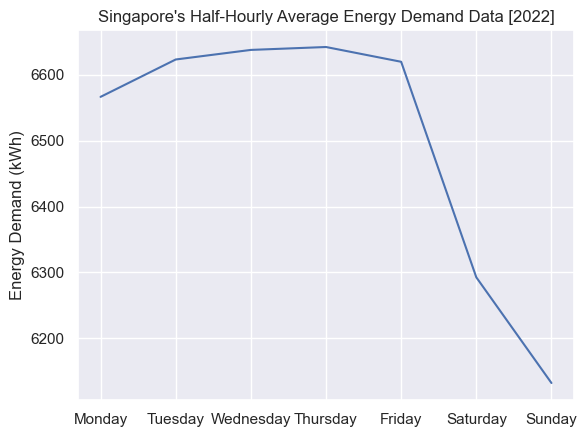

In [4]:
y_val = []
for day in df.index.day_name().unique():
    day_temp = df[df.index.day_name() == day]
    y_val.append(day_temp.mean())

plt.figure()
plt.plot(df.index.day_name().unique(),y_val)
plt.title("Singapore's Half-Hourly Average Energy Demand Data [2022]")
plt.ylabel('Energy Demand (kWh)')

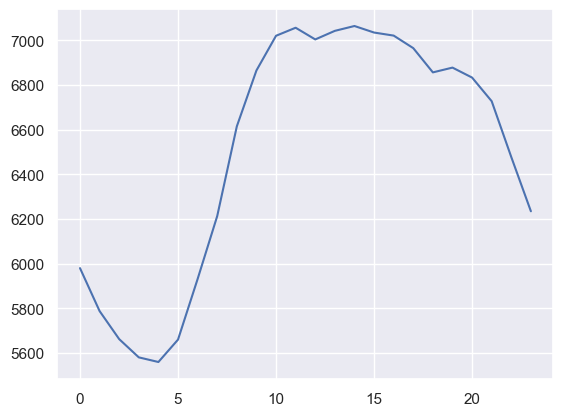

In [5]:
y_val = []
for hour in df.index.hour.unique():
    hour_temp = df[df.index.hour == hour]
    y_val.append(hour_temp.mean())

plt.figure()
plt.plot(df.index.hour.unique(),y_val)

Text(0, 0.5, 'Energy Demand (kWh)')

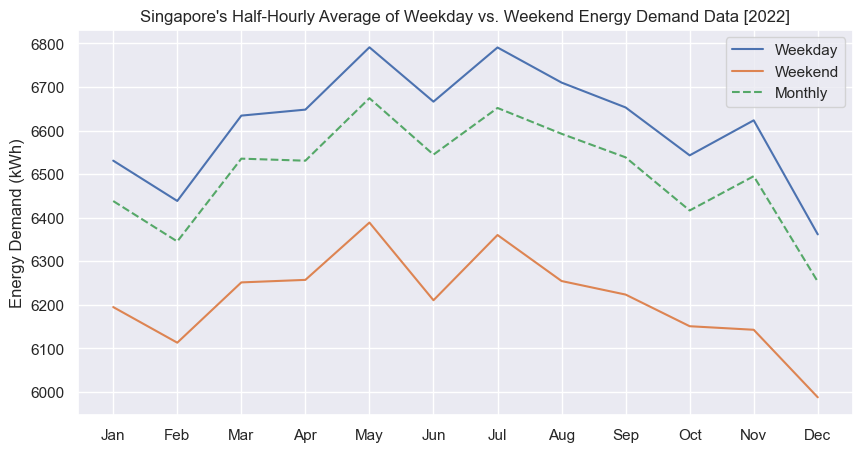

In [6]:
weekend = []
weekday = []
monthly = []
for month in df.index.month_name().unique():
    month_temp = df[df.index.month_name() == month] 
    monthly.append(month_temp.mean())
    weekend.append(month_temp[month_temp.index.dayofweek >= 5].mean())
    weekday.append(month_temp[month_temp.index.dayofweek < 5].mean())

xval = [i[:3] for i in df.index.month_name().unique()]
plt.figure(figsize = (10,5))
plt.plot(xval,weekday, label = 'Weekday')
plt.plot(xval,weekend, label = 'Weekend')
plt.plot(monthly, label = 'Monthly', linestyle = '--')

plt.legend()
plt.title("Singapore's Half-Hourly Average of Weekday vs. Weekend Energy Demand Data [2022]")
plt.ylabel('Energy Demand (kWh)')